In [1]:
#KNN LogReg SVM DecisionTree RandomForest

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [3]:
loan_data = pd.read_csv("Loan Dataset.csv")

In [4]:
loan = loan_data.copy()

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [6]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
loan.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000000,614.000000,614.000000,592.000000,600.00000,564.000000
mean,0.762938,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,1.015216,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000
25%,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,2.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
loan.shape

(614, 13)

In [9]:
loan.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

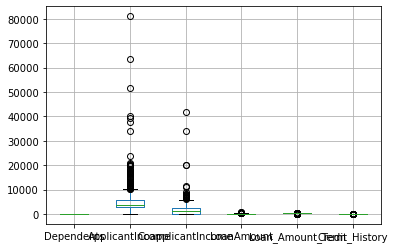

In [10]:
loan.boxplot()

<AxesSubplot:ylabel='Loan_Status'>

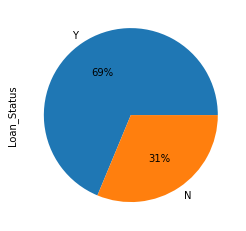

In [11]:
loan['Loan_Status'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

In [12]:
#Fill null categorical data with the mode
loan['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True) 
loan['Married'].fillna(loan_data['Married'].mode()[0], inplace=True) 
loan['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True) 
loan['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True) 
loan['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

In [13]:
loan['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [14]:
#Fill null values with mode
loan['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)

In [15]:
#Fill null LoanAmount with median
loan['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

In [16]:
loan.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
loan = loan.drop('Loan_ID', axis = 1)

In [18]:
loan

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3.0,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1.0,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2.0,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:>

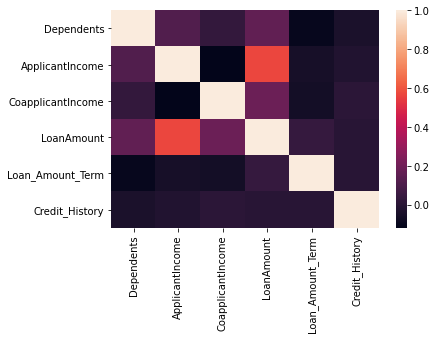

In [19]:
loan.corr()
sns.heatmap(loan.corr().round(2))

<AxesSubplot:ylabel='Loan_Status'>

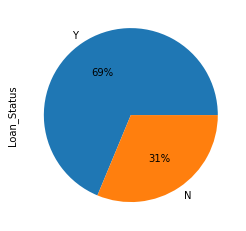

In [20]:
loan['Loan_Status'].value_counts().plot(kind = 'pie', autopct='%1.0f%%')

In [21]:
loan = pd.get_dummies(loan, drop_first = True)

In [22]:
loan.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,0.0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1,1
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1,1
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1,1
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1,1


In [23]:
loan.shape

(614, 13)

In [24]:
x = loan.drop("Loan_Status_Y", axis = 1)
y= loan["Loan_Status_Y"]

In [25]:
x.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5849,0.0,128.0,360.0,1.0,1,0,0,0,0,1
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1


In [26]:
#Split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

In [27]:
scaler = MinMaxScaler()

In [28]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [29]:
x_train

array([[0.        , 0.03767793, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.03843297, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.66666667, 0.03874242, 0.04103967, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.03204605, 0.05407157, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.02814705, 0.05524756, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.027392  , 0.0121199 , ..., 0.        , 1.        ,
        0.        ]])

In [30]:
# fitting our logistic regression algorithm
reg = LogisticRegression()
reg.fit(x_train,y_train)

LogisticRegression()

In [31]:
# predicting the test set
y_pred = reg.predict(x_test)

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [33]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.8536585365853658
0.8316831683168316


<AxesSubplot:>

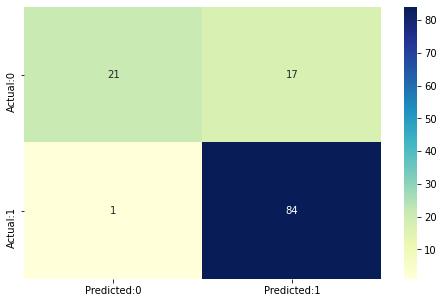

In [34]:
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [35]:
#Confusion Matrix for Logistic Regression
#TP = 21
#TN = 84
#FN = 17
#FP = 1

In [36]:
# fitting our K-nearest neighbour algorithm
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [37]:
# predicting the test set
y_pred2 = knn.predict(x_test)

In [38]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.53      0.66        38
           1       0.82      0.96      0.89        85

    accuracy                           0.83       123
   macro avg       0.84      0.75      0.77       123
weighted avg       0.84      0.83      0.82       123



In [39]:
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.8292682926829268
0.82


<AxesSubplot:>

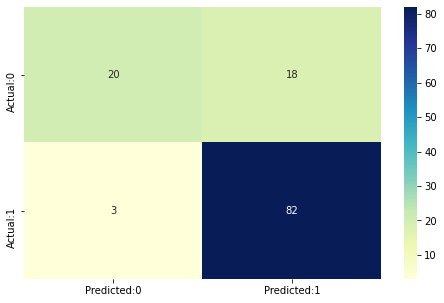

In [40]:
cm = confusion_matrix(y_test,y_pred2)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [41]:
#Confusion Matrix for K Nearest Neighbours
#TP = 20
#TN = 82
#FN = 18
#FP = 3

In [42]:
# fitting the decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
# predicting the test set
y_pred3 = dtc.predict(x_test)

In [44]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.56      0.63      0.59        38
           1       0.82      0.78      0.80        85

    accuracy                           0.73       123
   macro avg       0.69      0.70      0.70       123
weighted avg       0.74      0.73      0.74       123



In [45]:
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.7317073170731707
0.825


<AxesSubplot:>

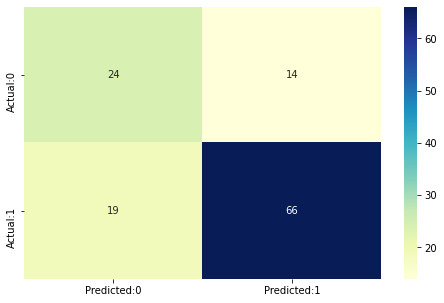

In [46]:
cm = confusion_matrix(y_test,y_pred3)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [47]:
#Confusion Matrix for Decision Tree Classifier
#TP = 23
#TN = 68
#FN = 15
#FP = 17

In [48]:
# fitting the Random forest classifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
# predicting the test set
y_pred4 = rfc.predict(x_test)

In [50]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.85      0.93      0.89        85

    accuracy                           0.84       123
   macro avg       0.82      0.78      0.80       123
weighted avg       0.83      0.84      0.83       123



In [51]:
print(accuracy_score(y_test,y_pred4))
print(precision_score(y_test,y_pred4))

0.8373983739837398
0.8494623655913979


<AxesSubplot:>

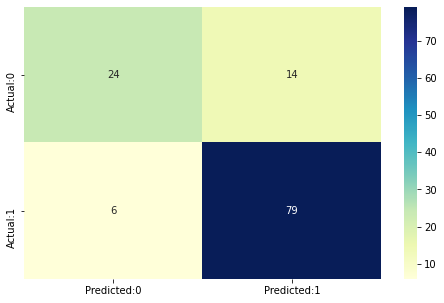

In [52]:
cm = confusion_matrix(y_test,y_pred4)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [53]:
#Confusion Matrix for Decision Tree Classifier
#TP = 25
#TN = 76
#FN = 13
#FP = 9

In [54]:
# fitting the Support Vector Machine
s_vector = SVC()
s_vector.fit(x_train,y_train)

SVC()

In [55]:
# predicting the test set
y_pred5 = s_vector.predict(x_test)

In [56]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

           0       0.95      0.55      0.70        38
           1       0.83      0.99      0.90        85

    accuracy                           0.85       123
   macro avg       0.89      0.77      0.80       123
weighted avg       0.87      0.85      0.84       123



In [57]:
print(accuracy_score(y_test,y_pred5))
print(precision_score(y_test,y_pred5))

0.8536585365853658
0.8316831683168316


<AxesSubplot:>

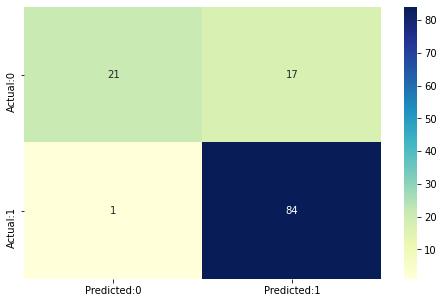

In [58]:
cm = confusion_matrix(y_test,y_pred5)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [59]:
#Confusion Matrix for Support Vector Classifier
#TP = 21
#TN = 84
#FN = 17
#FP = 1

In [60]:
import joblib

In [61]:
# save the random forest model with joblib
joblib.dump(reg, 'reg_joblib.pkl')

['reg_joblib.pkl']

In [62]:
# load model from file
log_class = joblib.load('reg_joblib.pkl')

In [63]:
# importing new test data
test = pd.read_csv('loan_test_data.csv')

In [64]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [65]:
test.shape

(367, 12)

In [66]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [67]:
test = test.dropna()

In [68]:
ltd = test.drop('Loan_ID', axis = 1)

In [69]:
# Label Encoding for columns with words
ltd = pd.get_dummies(ltd, drop_first=True)

In [70]:
ltd.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,0.0,5720,0,110.0,360.0,1.0,1,1,0,0,0,1
1,1.0,3076,1500,126.0,360.0,1.0,1,1,0,0,0,1
2,2.0,5000,1800,208.0,360.0,1.0,1,1,0,0,0,1
4,0.0,3276,0,78.0,360.0,1.0,1,0,1,0,0,1
5,0.0,2165,3422,152.0,360.0,1.0,1,1,1,1,0,1


In [71]:
ltd.shape

(289, 12)

In [72]:
loan_st = log_class.predict(ltd)

In [73]:
loan_st

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1], dtype=uint8)

In [74]:
scalar = MinMaxScaler()
ltd = scaler.fit_transform(ltd)

In [75]:
ltd

array([[0.        , 0.07886501, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.33333333, 0.04241062, 0.0625    , ..., 0.        , 0.        ,
        1.        ],
       [0.66666667, 0.06893794, 0.075     , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.05732879, 0.02954167, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.06893794, 0.09970833, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.12684581, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In [76]:
loan_st.shape

(289,)

In [77]:
loan_st.reshape

<function ndarray.reshape>

In [78]:
loan_st.shape

(289,)

In [79]:
loan_st.dtype

dtype('uint8')

In [80]:
loan_st.astype(int)

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1])

In [81]:
loan_st.dtype

dtype('uint8')

In [82]:
test['pred_loan_status'] = loan_st

In [83]:
test.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,pred_loan_status
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,1
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,0
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,0
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,1
5,LP001054,Male,Yes,0.0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban,0
6,LP001055,Female,No,1.0,Not Graduate,No,2226,0,59.0,360.0,1.0,Semiurban,1
7,LP001056,Male,Yes,2.0,Not Graduate,No,3881,0,147.0,360.0,0.0,Rural,1
9,LP001067,Male,No,0.0,Not Graduate,No,2400,2400,123.0,360.0,1.0,Semiurban,0
10,LP001078,Male,No,0.0,Not Graduate,No,3091,0,90.0,360.0,1.0,Urban,1
14,LP001096,Female,No,0.0,Graduate,No,4666,0,124.0,360.0,1.0,Semiurban,1
